In [1]:
import pyAudioKits.record

pyAudioKits provides an audio recording api. First, run the code below to record a 5s audio. 

********** Please speak in 5 seconds. 
********** End of recording.



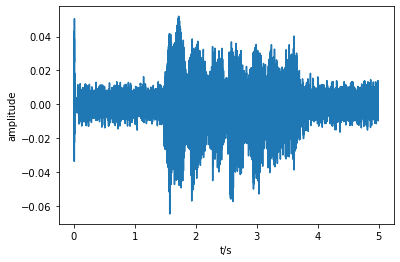

<Figure size 432x288 with 0 Axes>

In [3]:
record = pyAudioKits.record.record(44100,5)  #Record 5s of audio at a sample rate of 44100
record.plot()    #Plotting audio waveforms

Sound is generated due to the vibration of a medium, and the pattern of vibration can be described as a **stochastic process**. The essence of an audio signal is a single realization of the stochastic process $\{X(t),-∞<t<∞\}$ \{x(t),-∞<t<∞\}$.

Real-world audio signals are analog and have the characteristics of taking continuous values, continuous time, and infinite rather than causal (real-world sounds exist from before the recording starts and continue after the recording stops). To be able to represent and store the audio signal in a computer, three operations are performed during the recording of audio.

One is **quantization**, the so-called **quantization** is to use a finite number of bits to represent the value of $x(t),\forall t$, thus solving the problem of taking consecutive values. And in modern computer systems, float, double, and other data types have been able to make audio quantization quite fine, resulting in the impact can generally be ignored.

Second, **sampling**, the so-called **sampling**, is to let the time domain is factor $T_s$ normalized: $\{x[n]=x(nT_s),-∞<n<∞\}$ , so that we can represent the audio signal by a vector $\vec x_n=x[n]$ with a finite number of components. Each $n$ represents one component of the vector, and the time interval between samples is $T_s$. The $T_s$ is called the **sampling period** and its inverse is the **sampling rate**. This is equivalent to multiplying the analog signal by an impulse sequence with an interval of $T_s$, which in practice is that every time $T_s$, the analog signal $x(t)$ is quantized once. The obtained $x[n]$ is the discrete **digital signal**.

Just now we recorded audio using a sample rate of 44100Hz, and the sample period is (1/44100)s.

In [4]:
record.sr    #Show the sample rate

44100

The sampling rate $1/T_s$ is 44100Hz.

Thirdly, **truncation**, for example, the duration of recorded audio is 5s, which is equivalent to just taking $\{x(t),0≤t<5\}$ and then sampling and quantizing to get $\{x[n],0≤n<44100*5\}$ (the time $t$ when the analog signal is generally started to be collected is set to 0). In the representation it is considered whether to truncate first to get $\{x(t),0≤t<T_sN_{max}\}$ before sampling into $\{x[n],0≤n<N_{max}\}$, or to sample first into $\{x[n],-∞≤n<∞\}$ before truncation to get $\{x[n],0≤n<N_{max}\}$. 

In [5]:
len(record)	#Get the number of audio samples

220500

The number of audio samples $N_{max}$ is 220500. we can also plot the waveform with the number of samples as the x-axis.

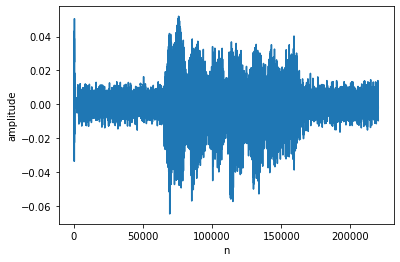

<Figure size 432x288 with 0 Axes>

In [6]:
record.plot(xlabel="n")

In [ ]:
record.getDuration()

5.0

The audio duration $T_sN_{max}$ is 5s, which matches our expression.

Also, truncation is equivalent to first sampling to get $\{x_d[n],-∞≤n<∞\}$, then multiplying by a **rectangular window** $w[n]=\begin{cases}1\quad 0≤n<N_{max}\\0\quad others\end{cases}$ to get $x[n]=\begin{cases}x_d[n]\quad 0≤n<N_{max}\\0\quad others\end{cases}$ . This operation is called **windowing**.

After quantization, sampling, and truncation, the audio signal is represented as a digital audio signal that can be stored in a computer and represented as a vector, while the sample rate and duration are the most basic properties of the audio signal.